# I'm here to (try) to convince you that ______________ is better than Aaron Judge and Shohei Ohtani (even though I love Shohei Ohtani).

## MLB Batting Stats Analysis 2024 Regular Season

This notebook analyzes the MLB batting stats for the 2024 season. The dataset is sourced from [Baseball Reference](https://www.baseball-reference.com/leagues/majors/2024-standard-batting.shtml) and was downloaded in CSV format.

We will explore various statistics, filter data based on specific criteria, and visualize the results to gain insights into player performances.
Disclaimer this is a very simplistic view of how I would look at baseball from a layperson perspective, might continue this for my final and try do some proper analysis.

In [1]:
# Imports needed and config
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 4)

In [2]:
#Importing the dataset
df = pd.read_csv("MLB_Batting_Stats_2024.csv")
df

,Rk,Player,Age,Team,Lg,WAR,G,PA,AB,R,...,Rbat+,TB,GIDP,HBP,SH,SF,IBB,Pos,Awards,Player-additional
0,1.0,Aaron Judge,32.0,NYY,AL,10.8,158.0,704.0,559.0,122.0,...,223.0,392.0,22.0,9.0,0.0,2.0,20.0,*8D/97,AS,judgeaa01
1,2.0,Shohei Ohtani*,29.0,LAD,NL,9.2,159.0,731.0,636.0,134.0,...,190.0,411.0,7.0,6.0,0.0,5.0,10.0,*D,AS,ohtansh01
2,3.0,Anthony Santander#,29.0,BAL,AL,2.9,155.0,665.0,595.0,91.0,...,131.0,301.0,9.0,7.0,0.0,5.0,3.0,*9D/3H,AS,santaan02
3,4.0,Juan Soto*,25.0,NYY,AL,7.9,157.0,713.0,576.0,128.0,...,179.0,328.0,10.0,4.0,0.0,4.0,2.0,*9/7DH,AS,sotoju01
4,5.0,Marcell Ozuna,33.0,ATL,NL,4.3,162.0,688.0,606.0,96.0,...,154.0,331.0,23.0,3.0,0.0,4.0,2.0,*D,AS,ozunama01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,738.0,Eric Yang,26.0,CIN,NL,NaN,1.0,1.0,1.0,0.0,...,-145.0,0.0,0.0,0.0,0.0,0.0,0.0,/H,NaN,yanger01
892,739.0,Kirby Yates*,37.0,TEX,AL,0.0,3.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,AS,yateski01
893,740.0,Alex Young*,30.0,CIN,NL,0.0,1.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,/1,NaN,youngal01
894,741.0,Guillo Zuñiga,25.0,LAA,AL,0.0,1.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN,zuniggu01


In [3]:
# Lets look at the rows and the data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rk                 895 non-null    float64
 1   Player             896 non-null    object 
 2   Age                895 non-null    float64
 3   Team               895 non-null    object 
 4   Lg                 895 non-null    object 
 5   WAR                893 non-null    float64
 6   G                  895 non-null    float64
 7   PA                 895 non-null    float64
 8   AB                 895 non-null    float64
 9   R                  895 non-null    float64
 10  H                  895 non-null    float64
 11  2B                 895 non-null    float64
 12  3B                 895 non-null    float64
 13  HR                 895 non-null    float64
 14  RBI                895 non-null    float64
 15  SB                 895 non-null    float64
 16  CS                 895 non

## Who's qualified?
Now lets filter it to only have players with qualified plate appearances ( > 502 over a 162 game season) according to the MLB awards requirement.

In [4]:
# Filtering the dataset to only include players with more than 502 plate appearances
qualified = df[df['PA'] > 502]
qualified

,Rk,Player,Age,Team,Lg,WAR,G,PA,AB,R,...,Rbat+,TB,GIDP,HBP,SH,SF,IBB,Pos,Awards,Player-additional
0,1.0,Aaron Judge,32.0,NYY,AL,10.8,158.0,704.0,559.0,122.0,...,223.0,392.0,22.0,9.0,0.0,2.0,20.0,*8D/97,AS,judgeaa01
1,2.0,Shohei Ohtani*,29.0,LAD,NL,9.2,159.0,731.0,636.0,134.0,...,190.0,411.0,7.0,6.0,0.0,5.0,10.0,*D,AS,ohtansh01
2,3.0,Anthony Santander#,29.0,BAL,AL,2.9,155.0,665.0,595.0,91.0,...,131.0,301.0,9.0,7.0,0.0,5.0,3.0,*9D/3H,AS,santaan02
3,4.0,Juan Soto*,25.0,NYY,AL,7.9,157.0,713.0,576.0,128.0,...,179.0,328.0,10.0,4.0,0.0,4.0,2.0,*9/7DH,AS,sotoju01
4,5.0,Marcell Ozuna,33.0,ATL,NL,4.3,162.0,688.0,606.0,96.0,...,154.0,331.0,23.0,3.0,0.0,4.0,2.0,*D,AS,ozunama01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,290.0,Brice Turang*,24.0,MIL,NL,4.6,155.0,619.0,559.0,72.0,...,85.0,195.0,8.0,2.0,5.0,3.0,1.0,*4H/D,NaN,turanbr02
420,347.0,Luis Arráez*,27.0,2TM,NL,1.1,150.0,672.0,637.0,83.0,...,104.0,250.0,18.0,8.0,2.0,1.0,3.0,3D4/H,AS,arraelu01
422,347.0,Luis Arráez*,27.0,SDP,NL,1.0,117.0,524.0,500.0,61.0,...,106.0,199.0,13.0,6.0,1.0,1.0,3.0,3D/4H,NaN,arraelu01
505,413.0,Jacob Young,24.0,WSN,NL,2.6,150.0,521.0,468.0,75.0,...,87.0,155.0,11.0,12.0,9.0,2.0,0.0,*8/HD,NaN,youngja03


Now if we looked at the stats clearly Aaron Judge and Shohei Ohtani and leagues above everyone being ranked 1 and 2 this year (although I believe Ohtani is better than Judge).
Now let's split the the batters by league, we need a replacement for each of them.

In [5]:
al_qualified = qualified[qualified['Lg'] == 'AL']
nl_qualified = qualified[qualified['Lg'] == 'NL']

In [6]:
al_qualified

,Rk,Player,Age,Team,Lg,WAR,G,PA,AB,R,...,Rbat+,TB,GIDP,HBP,SH,SF,IBB,Pos,Awards,Player-additional
0,1.0,Aaron Judge,32.0,NYY,AL,10.8,158.0,704.0,559.0,122.0,...,223.0,392.0,22.0,9.0,0.0,2.0,20.0,*8D/97,AS,judgeaa01
2,3.0,Anthony Santander#,29.0,BAL,AL,2.9,155.0,665.0,595.0,91.0,...,131.0,301.0,9.0,7.0,0.0,5.0,3.0,*9D/3H,AS,santaan02
3,4.0,Juan Soto*,25.0,NYY,AL,7.9,157.0,713.0,576.0,128.0,...,179.0,328.0,10.0,4.0,0.0,4.0,2.0,*9/7DH,AS,sotoju01
5,6.0,José Ramírez#,31.0,CLE,AL,6.8,158.0,682.0,620.0,114.0,...,140.0,333.0,9.0,1.0,0.0,6.0,12.0,*5D,AS,ramirjo01
6,7.0,Brent Rooker,29.0,OAK,AL,5.6,145.0,614.0,546.0,82.0,...,166.0,307.0,5.0,5.0,0.0,4.0,4.0,*D/79H,NaN,rookebr01
8,9.0,Gunnar Henderson*,23.0,BAL,AL,9.1,159.0,719.0,630.0,118.0,...,157.0,333.0,2.0,7.0,0.0,4.0,1.0,*6/D,AS,hendegu01
10,11.0,Yordan Alvarez*,27.0,HOU,AL,5.4,147.0,635.0,552.0,88.0,...,169.0,313.0,14.0,10.0,0.0,4.0,16.0,D7,AS,alvaryo01
12,13.0,Cal Raleigh#,27.0,SEA,AL,4.6,153.0,628.0,546.0,73.0,...,117.0,238.0,7.0,6.0,0.0,6.0,4.0,*2D/H,NaN,raleica01
16,17.0,Bobby Witt Jr.,24.0,KCR,AL,9.4,161.0,709.0,636.0,125.0,...,171.0,374.0,4.0,8.0,0.0,8.0,9.0,*6/D,AS,wittbo02
17,18.0,Josh Naylor*,27.0,CLE,AL,1.5,152.0,633.0,563.0,84.0,...,117.0,257.0,17.0,7.0,0.0,4.0,7.0,*3D/H,AS,naylojo01


In [7]:
nl_qualified

,Rk,Player,Age,Team,Lg,WAR,G,PA,AB,R,...,Rbat+,TB,GIDP,HBP,SH,SF,IBB,Pos,Awards,Player-additional
1,2.0,Shohei Ohtani*,29.0,LAD,NL,9.2,159.0,731.0,636.0,134.0,...,190.0,411.0,7.0,6.0,0.0,5.0,10.0,*D,AS,ohtansh01
4,5.0,Marcell Ozuna,33.0,ATL,NL,4.3,162.0,688.0,606.0,96.0,...,154.0,331.0,23.0,3.0,0.0,4.0,2.0,*D,AS,ozunama01
7,8.0,Kyle Schwarber*,31.0,PHI,NL,3.5,150.0,692.0,573.0,110.0,...,137.0,278.0,6.0,5.0,0.0,8.0,4.0,*D/7H,NaN,schwaky01
9,10.0,Ketel Marte#,30.0,ARI,NL,6.8,136.0,583.0,504.0,93.0,...,155.0,282.0,9.0,5.0,0.0,9.0,7.0,*4D/H6,AS,marteke01
11,12.0,Pete Alonso,29.0,NYM,NL,2.6,162.0,695.0,608.0,91.0,...,122.0,279.0,14.0,13.0,0.0,4.0,4.0,*3/DH,AS,alonspe01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,290.0,Brice Turang*,24.0,MIL,NL,4.6,155.0,619.0,559.0,72.0,...,85.0,195.0,8.0,2.0,5.0,3.0,1.0,*4H/D,NaN,turanbr02
420,347.0,Luis Arráez*,27.0,2TM,NL,1.1,150.0,672.0,637.0,83.0,...,104.0,250.0,18.0,8.0,2.0,1.0,3.0,3D4/H,AS,arraelu01
422,347.0,Luis Arráez*,27.0,SDP,NL,1.0,117.0,524.0,500.0,61.0,...,106.0,199.0,13.0,6.0,1.0,1.0,3.0,3D/4H,NaN,arraelu01
505,413.0,Jacob Young,24.0,WSN,NL,2.6,150.0,521.0,468.0,75.0,...,87.0,155.0,11.0,12.0,9.0,2.0,0.0,*8/HD,NaN,youngja03


## Let's look at WAR.

Now lets compare each league's average just for the sake of argument over which league is harder.
Lets look at average WAR first.
WAR stands for Wins Above Replacement which is just fancy talk for how much "better" they are than an average player.

WAR measures a player's value in all facets of the game by deciphering how many more wins he's worth than a replacement-level player at his same position (e.g., a Minor League replacement or a readily available fill-in free agent).

It's the most accessible advanced stat for non statistical people (me) to understand.



In [8]:
# Calculating the average WAR for AL players
al_qualified['WAR'].mean()

np.float64(3.4298245614035086)

In [9]:
# Calculating the average WAR for NL players
nl_qualified['WAR'].mean()

np.float64(2.9499999999999997)

AL hitters are providing much more value than the NL hitters in terms of average WAR.
Baseball statisticians love to look at WAR cause it's an absolute value of how much better someone is over others. But I don't quite like that. I think we should look at the individual numbers.
Lets filter so that we only see some key stats that I'm interested in. Also split between raw hitting stats and compounded stats.

In [10]:
# Removing columns that are not needed for the analysis
al_qualified_raw_hitting = al_qualified.drop(columns=["Rk", "Pos", "Age", "Team", "Lg", "WAR", "G", "PA", "AB", "CS", "BB", "SO", "BA", "OBP", "SLG", "OPS", "OPS+", "rOBA", "Rbat+", "TB", "GIDP", "HBP", "SH", "SF", "IBB", "Pos", "Awards", "Player-additional"])
al_qualified_raw_hitting

,Player,R,H,2B,3B,HR,RBI,SB
0,Aaron Judge,122.0,180.0,36.0,1.0,58.0,144.0,10.0
2,Anthony Santander#,91.0,140.0,25.0,2.0,44.0,102.0,2.0
3,Juan Soto*,128.0,166.0,31.0,4.0,41.0,109.0,7.0
5,José Ramírez#,114.0,173.0,39.0,2.0,39.0,118.0,41.0
6,Brent Rooker,82.0,160.0,26.0,2.0,39.0,112.0,11.0
8,Gunnar Henderson*,118.0,177.0,31.0,7.0,37.0,92.0,21.0
10,Yordan Alvarez*,88.0,170.0,34.0,2.0,35.0,86.0,6.0
12,Cal Raleigh#,73.0,120.0,16.0,0.0,34.0,100.0,6.0
16,Bobby Witt Jr.,125.0,211.0,45.0,11.0,32.0,109.0,31.0
17,Josh Naylor*,84.0,137.0,27.0,0.0,31.0,108.0,6.0


In [11]:
nl_qualified_raw_hitting = nl_qualified.drop(columns=["Rk", "Pos", "Age", "Team", "Lg", "WAR", "G", "PA", "AB", "CS", "BB", "SO", "BA", "OBP", "SLG", "OPS", "OPS+", "rOBA", "Rbat+", "TB", "GIDP", "HBP", "SH", "SF", "IBB", "Pos", "Awards", "Player-additional"])
nl_qualified_raw_hitting

,Player,R,H,2B,3B,HR,RBI,SB
1,Shohei Ohtani*,134.0,197.0,38.0,7.0,54.0,130.0,59.0
4,Marcell Ozuna,96.0,183.0,31.0,0.0,39.0,104.0,1.0
7,Kyle Schwarber*,110.0,142.0,22.0,0.0,38.0,104.0,5.0
9,Ketel Marte#,93.0,147.0,23.0,2.0,36.0,95.0,7.0
11,Pete Alonso,91.0,146.0,31.0,0.0,34.0,88.0,3.0
...,...,...,...,...,...,...,...,...
339,Brice Turang*,72.0,142.0,24.0,4.0,7.0,57.0,50.0
420,Luis Arráez*,83.0,200.0,32.0,3.0,4.0,46.0,9.0
422,Luis Arráez*,61.0,159.0,24.0,2.0,4.0,41.0,9.0
505,Jacob Young,75.0,120.0,24.0,1.0,3.0,36.0,33.0


Not sure if the Run stat "R" had already included Home runs "HR" hit by the player.
Got curious about something here, is there anyone who only hit 1 homerun and had 1 run.

In [12]:
# Sorting to see if there is any player that only had one run, one hit, and one home run
one_run_one_run = df[(df['H'] == 1) &  (df['R'] == 1) & (df['HR'] == 1)]
one_run_one_run = one_run_one_run.drop(columns=["Rk", "Pos", "Age", "WAR", "G", "PA", "AB", "CS", "BB", "SO", "BA", "OBP", "SLG", "OPS", "OPS+", "rOBA", "Rbat+", "TB", "GIDP", "HBP", "SH", "SF", "IBB", "Pos", "Awards", "Player-additional"])
one_run_one_run

,Player,Team,Lg,R,H,2B,3B,HR,RBI,SB
600,Greg Jones#,COL,NL,1.0,1.0,0.0,0.0,1.0,1.0,0.0


Interesting find, amongst all MLB hitters (896 of them) this year there's only one person who has [1 Hit which was a Home run](https://www.mlb.com/video/greg-jones-homers-1-on-a-fly-ball-to-right-field?q=BatterId%20%3D%20%5B675659%5D%20AND%20BattingTeamId%20%3D%20%5B115%5D%20AND%20HitResult%20%3D%20%5B%22Hit%22%5D%20AND%20GameType%20%3D%20%5B%22REGULAR_SEASON%22%5D%20AND%20Season%20%3D%20%5B2024%5D%20Order%20By%20Timestamp%20DESC&cp=MIXED&p=0)
. 
But this answers my question, Home runs are already included in the Run stat.

## Let's talk MVP, Most Valuable Player. 

What's value in baseball? In a simple layperson term, whoever scores more runs wins with, so whichever players produces the most runs contributes the most value!

So for that let's get a new column that represents the total runs they scored (player crosses home plate) stat "R" and helped scored (another player crosses home plate because of them) stat "RBI".

In [13]:
# Adding a column to calculate the total runs for each player
al_qualified_raw_hitting_total_runs = al_qualified_raw_hitting.assign(total_runs = al_qualified_raw_hitting['R'] + al_qualified_raw_hitting['RBI'])
nl_qualified_raw_hitting_total_runs = nl_qualified_raw_hitting.assign(total_runs = nl_qualified_raw_hitting['R'] + nl_qualified_raw_hitting['RBI'])

In [14]:
al_qualified_raw_hitting_total_runs.sort_values(by=["total_runs"], ascending=False)

,Player,R,H,2B,3B,HR,RBI,SB,total_runs
0,Aaron Judge,122.0,180.0,36.0,1.0,58.0,144.0,10.0,266.0
3,Juan Soto*,128.0,166.0,31.0,4.0,41.0,109.0,7.0,237.0
16,Bobby Witt Jr.,125.0,211.0,45.0,11.0,32.0,109.0,31.0,234.0
5,José Ramírez#,114.0,173.0,39.0,2.0,39.0,118.0,41.0,232.0
8,Gunnar Henderson*,118.0,177.0,31.0,7.0,37.0,92.0,21.0,210.0
19,Vladimir Guerrero Jr.,98.0,199.0,44.0,1.0,30.0,103.0,2.0,201.0
6,Brent Rooker,82.0,160.0,26.0,2.0,39.0,112.0,11.0,194.0
2,Anthony Santander#,91.0,140.0,25.0,2.0,44.0,102.0,2.0,193.0
17,Josh Naylor*,84.0,137.0,27.0,0.0,31.0,108.0,6.0,192.0
71,Jarren Duran*,111.0,191.0,48.0,14.0,21.0,75.0,34.0,186.0


In [15]:
nl_qualified_raw_hitting_total_runs.sort_values(by=["total_runs"], ascending=False)

,Player,R,H,2B,3B,HR,RBI,SB,total_runs
1,Shohei Ohtani*,134.0,197.0,38.0,7.0,54.0,130.0,59.0,264.0
7,Kyle Schwarber*,110.0,142.0,22.0,0.0,38.0,104.0,5.0,214.0
15,Willy Adames,93.0,153.0,33.0,0.0,32.0,112.0,21.0,205.0
4,Marcell Ozuna,96.0,183.0,31.0,0.0,39.0,104.0,1.0,200.0
14,Francisco Lindor#,107.0,169.0,39.0,1.0,33.0,91.0,29.0,198.0
...,...,...,...,...,...,...,...,...,...
93,Andrew McCutchen,66.0,104.0,18.0,1.0,20.0,50.0,3.0,116.0
505,Jacob Young,75.0,120.0,24.0,1.0,3.0,36.0,33.0,111.0
422,Luis Arráez*,61.0,159.0,24.0,2.0,4.0,41.0,9.0,102.0
525,Sal Frelick*,66.0,123.0,22.0,4.0,2.0,32.0,18.0,98.0


Ok so both Judge and Ohtani leads both leagues in runs that doesn't help my case. But it's easy to do that when you're in the two best teams in baseball right now. Both teams are in the world series as of this class and for both of them, more value came from RBIs (Runs batted in, which happens when they score a teammate.)

But for curiosity sake, did anyone have more RBIs than them?

In [16]:
al_qualified_raw_hitting_total_runs.sort_values(by=["RBI"], ascending=False)

,Player,R,H,2B,3B,HR,RBI,SB,total_runs
0,Aaron Judge,122.0,180.0,36.0,1.0,58.0,144.0,10.0,266.0
5,José Ramírez#,114.0,173.0,39.0,2.0,39.0,118.0,41.0,232.0
6,Brent Rooker,82.0,160.0,26.0,2.0,39.0,112.0,11.0,194.0
3,Juan Soto*,128.0,166.0,31.0,4.0,41.0,109.0,7.0,237.0
16,Bobby Witt Jr.,125.0,211.0,45.0,11.0,32.0,109.0,31.0,234.0
17,Josh Naylor*,84.0,137.0,27.0,0.0,31.0,108.0,6.0,192.0
29,Salvador Perez,58.0,160.0,28.0,0.0,27.0,104.0,0.0,162.0
19,Vladimir Guerrero Jr.,98.0,199.0,44.0,1.0,30.0,103.0,2.0,201.0
2,Anthony Santander#,91.0,140.0,25.0,2.0,44.0,102.0,2.0,193.0
12,Cal Raleigh#,73.0,120.0,16.0,0.0,34.0,100.0,6.0,173.0


In [17]:
nl_qualified_raw_hitting_total_runs.sort_values(by=["RBI"], ascending=False)

,Player,R,H,2B,3B,HR,RBI,SB,total_runs
1,Shohei Ohtani*,134.0,197.0,38.0,7.0,54.0,130.0,59.0,264.0
15,Willy Adames,93.0,153.0,33.0,0.0,32.0,112.0,21.0,205.0
25,Manny Machado,77.0,163.0,30.0,0.0,29.0,105.0,11.0,182.0
7,Kyle Schwarber*,110.0,142.0,22.0,0.0,38.0,104.0,5.0,214.0
4,Marcell Ozuna,96.0,183.0,31.0,0.0,39.0,104.0,1.0,200.0
...,...,...,...,...,...,...,...,...,...
127,Orlando Arcia,50.0,120.0,24.0,0.0,17.0,46.0,2.0,96.0
420,Luis Arráez*,83.0,200.0,32.0,3.0,4.0,46.0,9.0,129.0
422,Luis Arráez*,61.0,159.0,24.0,2.0,4.0,41.0,9.0,102.0
505,Jacob Young,75.0,120.0,24.0,1.0,3.0,36.0,33.0,111.0


Nope, ok not helping. Now but how productive are they on their own? Is anyone more productive than either of them?

In [18]:
al_qualified_raw_hitting_total_runs.sort_values(by=["R"], ascending=False)

,Player,R,H,2B,3B,HR,RBI,SB,total_runs
3,Juan Soto*,128.0,166.0,31.0,4.0,41.0,109.0,7.0,237.0
16,Bobby Witt Jr.,125.0,211.0,45.0,11.0,32.0,109.0,31.0,234.0
0,Aaron Judge,122.0,180.0,36.0,1.0,58.0,144.0,10.0,266.0
8,Gunnar Henderson*,118.0,177.0,31.0,7.0,37.0,92.0,21.0,210.0
5,José Ramírez#,114.0,173.0,39.0,2.0,39.0,118.0,41.0,232.0
71,Jarren Duran*,111.0,191.0,48.0,14.0,21.0,75.0,34.0,186.0
59,Marcus Semien,101.0,154.0,27.0,2.0,23.0,74.0,8.0,175.0
19,Vladimir Guerrero Jr.,98.0,199.0,44.0,1.0,30.0,103.0,2.0,201.0
88,Jose Altuve,94.0,185.0,31.0,0.0,20.0,65.0,22.0,159.0
2,Anthony Santander#,91.0,140.0,25.0,2.0,44.0,102.0,2.0,193.0


In [19]:
nl_qualified_raw_hitting_total_runs.sort_values(by=["R"], ascending=False)

,Player,R,H,2B,3B,HR,RBI,SB,total_runs
1,Shohei Ohtani*,134.0,197.0,38.0,7.0,54.0,130.0,59.0,264.0
62,Corbin Carroll*,121.0,136.0,22.0,14.0,22.0,74.0,35.0,195.0
7,Kyle Schwarber*,110.0,142.0,22.0,0.0,38.0,104.0,5.0,214.0
14,Francisco Lindor#,107.0,169.0,39.0,1.0,33.0,91.0,29.0,198.0
36,Elly De La Cruz#,105.0,160.0,36.0,10.0,25.0,76.0,67.0,181.0
...,...,...,...,...,...,...,...,...,...
33,Rhys Hoskins,59.0,96.0,14.0,0.0,26.0,82.0,3.0,141.0
220,Joey Ortiz,58.0,105.0,25.0,6.0,11.0,60.0,11.0,118.0
119,Luis García Jr.*,58.0,141.0,25.0,1.0,18.0,70.0,22.0,128.0
66,Heliot Ramos,54.0,128.0,23.0,3.0,22.0,72.0,6.0,126.0


Ok so in the American League, Juan Soto has more Runs than Aaron Judge but he's also a Yankee (so i want to disregard this but I can't).
In the National League, Shohei Ohtani still leads in Runs.

Ok this experiment is not working out well for me. Although something interesting, Bobby Wit Jr and Corbin Carroll looks like they're having pretty good seasons, just not as good as Judge and Ohtani but those numbers also look a alittle "non-traditionally" good. Maybe lets try a different approach. Time for some graphs. Let's find some outlying stats.

## Let's plot some graphs to look at relationships.

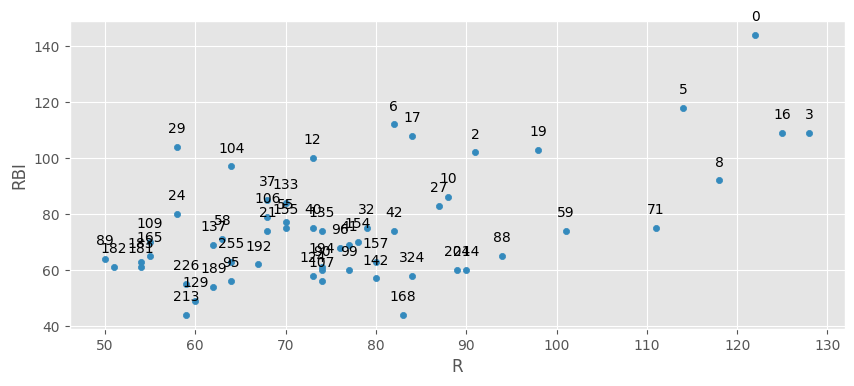

In [20]:
# Plotting a scatter plot to see the relationship between runs and RBIs.
al_qualified_raw_hitting_total_runs_graph = al_qualified_raw_hitting_total_runs.plot.scatter(x='R', y='RBI')

# Annotate each point with the player's index — Could not quite figure this out without some help from the documentation and AI to help fix some errors.
for i, player in al_qualified_raw_hitting_total_runs.iterrows():
    al_qualified_raw_hitting_total_runs_graph.annotate(i, (player['R'], player['RBI']), textcoords="offset points", xytext=(0,10), ha='center')

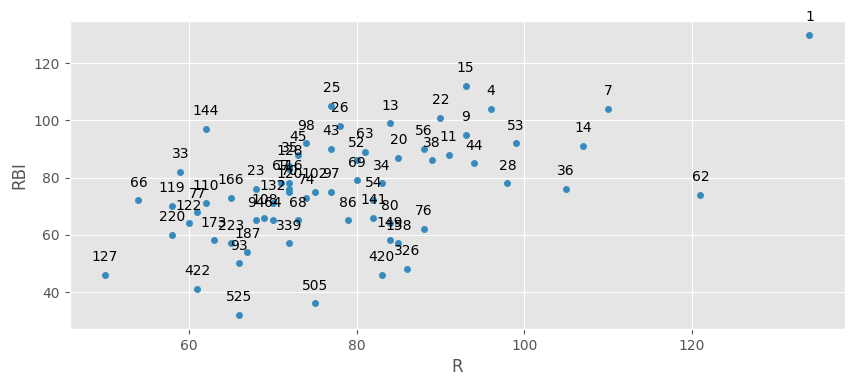

In [21]:
# Plotting a scatter plot to see the relationship between runs and RBIs.
nl_qualified_raw_hitting_total_runs_graph = nl_qualified_raw_hitting_total_runs.plot.scatter(x='R', y='RBI')

# Annotate each point with the player's index — Could not quite figure this out without some help from the documentation and AI to help fix some errors.
for i, player in nl_qualified_raw_hitting_total_runs.iterrows():
    nl_qualified_raw_hitting_total_runs_graph.annotate(i, (player['R'], player['RBI']), textcoords="offset points", xytext=(0,10), ha='center')

Damn, the main outliers are still Shohei Ohtani and Aaron Judge.
Although you can see that Corbin Carroll and Bobby Witt Jr are kind of special themselves.

Maybe let's shift gears, let's change this to a thought experiment where it's more who would be the MVPs if Judge and Ohtani did not exist.

Let's pick out some key players that looked like they had good seasons based purely on Runs and RBIs.

In [22]:
# Picking out the players that looked interesting.
al_selected_players = df.iloc[[0, 3, 5, 8, 16]]
al_selected_players_analyse = al_selected_players.drop(columns=["Rk", "Pos", "Age", "WAR", "G", "PA", "AB", "CS", "BB", "SO", "BA", "OBP", "SLG", "OPS", "OPS+", "rOBA", "Rbat+", "TB", "GIDP", "HBP", "SH", "SF", "IBB", "Pos", "Awards", "Player-additional"])
al_selected_players_analyse

,Player,Team,Lg,R,H,2B,3B,HR,RBI,SB
0,Aaron Judge,NYY,AL,122.0,180.0,36.0,1.0,58.0,144.0,10.0
3,Juan Soto*,NYY,AL,128.0,166.0,31.0,4.0,41.0,109.0,7.0
5,José Ramírez#,CLE,AL,114.0,173.0,39.0,2.0,39.0,118.0,41.0
8,Gunnar Henderson*,BAL,AL,118.0,177.0,31.0,7.0,37.0,92.0,21.0
16,Bobby Witt Jr.,KCR,AL,125.0,211.0,45.0,11.0,32.0,109.0,31.0


In [23]:
# Picking out the players that looked interesting.
nl_selected_players = df.iloc[[1, 7, 14, 36, 62]]
nl_selected_players_analyse = nl_selected_players.drop(columns=["Rk", "Pos", "Age", "WAR", "G", "PA", "AB", "CS", "BB", "SO", "BA", "OBP", "SLG", "OPS", "OPS+", "rOBA", "Rbat+", "TB", "GIDP", "HBP", "SH", "SF", "IBB", "Pos", "Awards", "Player-additional"])
nl_selected_players_analyse

,Player,Team,Lg,R,H,2B,3B,HR,RBI,SB
1,Shohei Ohtani*,LAD,NL,134.0,197.0,38.0,7.0,54.0,130.0,59.0
7,Kyle Schwarber*,PHI,NL,110.0,142.0,22.0,0.0,38.0,104.0,5.0
14,Francisco Lindor#,NYM,NL,107.0,169.0,39.0,1.0,33.0,91.0,29.0
36,Elly De La Cruz#,CIN,NL,105.0,160.0,36.0,10.0,25.0,76.0,67.0
62,Corbin Carroll*,ARI,NL,121.0,136.0,22.0,14.0,22.0,74.0,35.0


<Axes: ylabel='Player'>

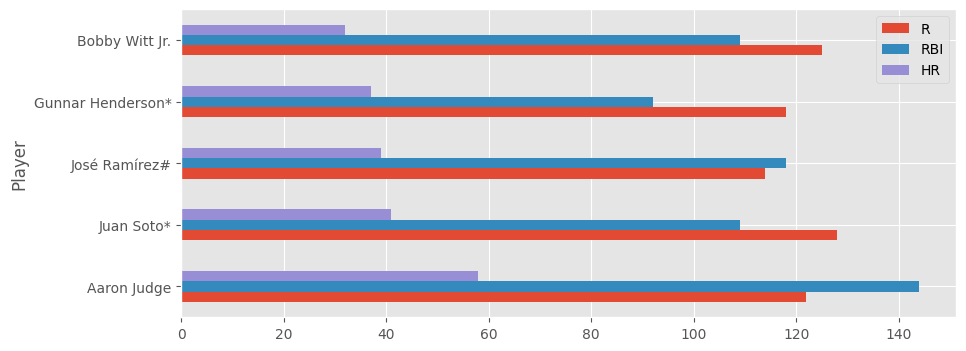

In [24]:
al_selected_players_analyse.plot(kind='barh', x='Player', y=['R', 'RBI', 'HR'])

<Axes: ylabel='Player'>

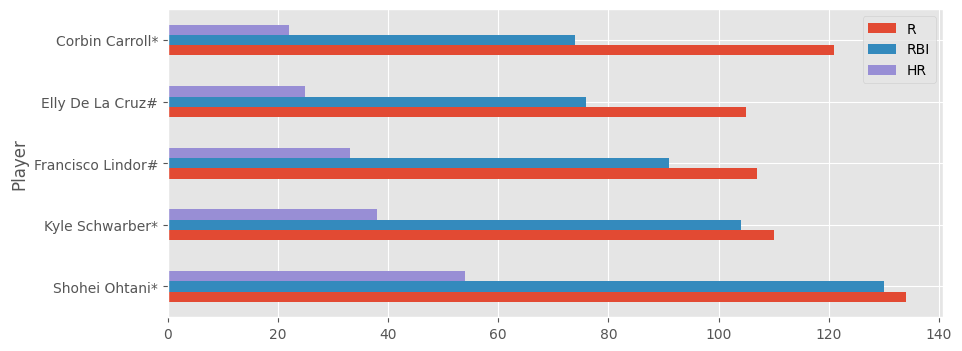

In [25]:
nl_selected_players_analyse.plot(kind='barh', x='Player', y=['R', 'RBI', 'HR'])

Ok conclusion — Going to draw some slightly problematic simplistic conclusion just by looking at the graphs and seeing which player has a similar profile in comparison with Judge and Ohtani.

In the AL,  It looks like Juan Soto or Jose Ramirez are top contenders for MPV in a Judge-less world, although purely based on player profile in terms of R, RBI and HR, Ramírez is more similar with more RBIs than Rs like judge, while Soto has more Rs than RBIs (my problematic assumption here is that, Soto doesn't help his teammates score home as much as they help him score him BUT. realistically looking at the yankees line up, it's more possible that Judge had already scored their teammates home putting Soto in less scoring positions to get RBIs).

In the NL, it's interesting all of the have similar profiles, the closes to Ohtani would be Kyle Schwarber or Francisco Lindor.

## Let's bring back WAR into the conversation to pick out which of the two from each league I would name as substitute MVP

In [26]:
possible_mvps = df.iloc[[3, 5, 7, 14]]
possible_mvps_analyse = possible_mvps.drop(columns=["Rk", "Pos", "Age", "G", "PA", "AB", "CS", "BB", "SO", "BA", "OBP", "SLG", "OPS", "OPS+", "rOBA", "Rbat+", "TB", "GIDP", "HBP", "SH", "SF", "IBB", "Pos", "Awards", "Player-additional"])
possible_mvps_analyse

,Player,Team,Lg,WAR,R,H,2B,3B,HR,RBI,SB
3,Juan Soto*,NYY,AL,7.9,128.0,166.0,31.0,4.0,41.0,109.0,7.0
5,José Ramírez#,CLE,AL,6.8,114.0,173.0,39.0,2.0,39.0,118.0,41.0
7,Kyle Schwarber*,PHI,NL,3.5,110.0,142.0,22.0,0.0,38.0,104.0,5.0
14,Francisco Lindor#,NYM,NL,7.0,107.0,169.0,39.0,1.0,33.0,91.0,29.0


The WARs have it, the MVPs are Juan Soto (to my saddness) and Francisco Lindor.

Although disclaimer about WAR is that it's position adjusted, so although Schwarber looks like offensively the better player, because there are less good replacement shortstops (Lindor) compared to outfielders (Schwarber), he would have a higher lower WAR.

## Conclusion

Moving forward, really thinking about doing this again for finals, cause there are so many more ways to look at it, I think one interesting one is to do cross comparisons with their team's stat to see how valuable they were to their team and we can look at the disparity between team, as no team is equal. All players looked at so far were in good wealthy teams which most probably had contributed to their success individually and as a team player, but there might be guys flying under the radar performing well but just with less inflated stats because they don't have as much opportunity as the players on good teams.

This exercise has helped me understand that even though baseball stats look quite black and white there are still many factors to look at and many ways to approach it. I could look at stuff like runners left on base to see how many opportunities they had, how many they squandered and how many there were successful and so many others, but the main interest now is to look at them possibly in context of their teams and then comparing across teams.

Also it's so hard to separate yourself from the data, this dataset is quite simple but due to me having a favourite team, favourite players and context of the sport, I can look at it objectively but I really still have other thoughts.